In [3]:
import pandas_datareader.data as web
import datetime
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
startdate = '2015-01-01'
enddate = '2021-10-22'

lin = yf.download(tickers="LIN", start=startdate, end=enddate, interval="1d")
wec = yf.download(tickers="WEC", start=startdate, end=enddate, interval="1d")
alb = yf.download(tickers="ALB", start=startdate, end=enddate, interval="1d")
ce = yf.download(tickers="CE", start=startdate, end=enddate, interval="1d")



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
# stocks = pd.concat([ceva['Close'], google['Close'],tesla['Close'],zom['Close']],axis=1)
# stocks.columns = ['CEVA','GOOGLE','TESLA', 'ZOMEDICA']
stocks = pd.concat([lin['Close'], wec['Close'], alb['Close'], ce['Close']],axis=1)
stocks.columns = ["LIN","WEC","ALB","CE"]

In [29]:
#compute return: Rt = Pt/Pt-1
returns = stocks/stocks.shift(1)
#compute Log Return: Log Rt = Log Pt/Pt-1
logReturns = np.log(returns)

[0.38993355 0.25537483 0.20483375 0.14985788]


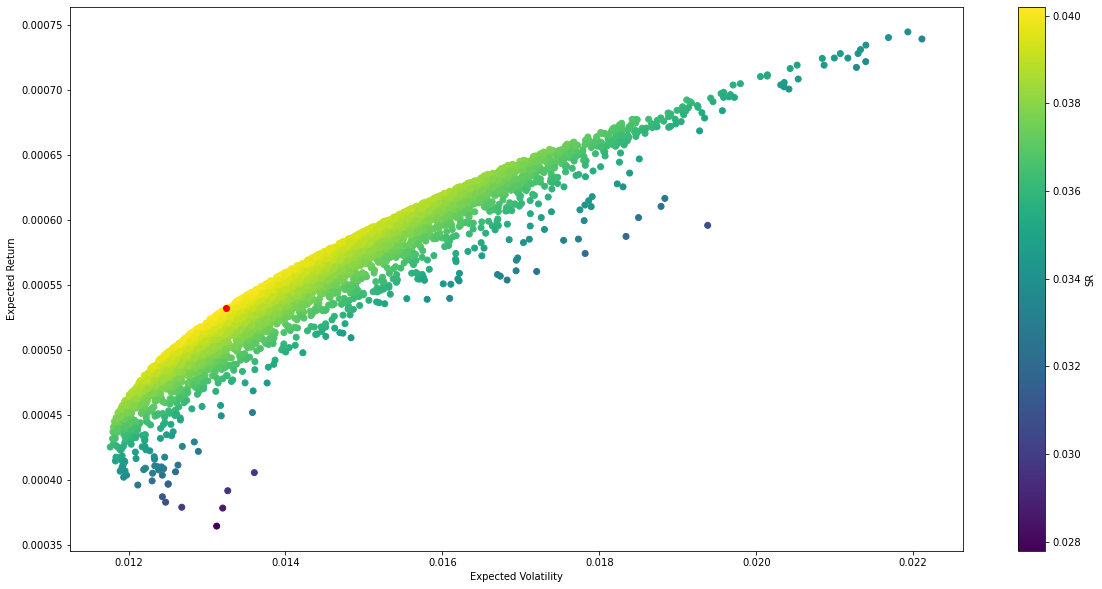

In [34]:
#Return vs Volatility Chart
numberOfPortfolios = 5000
weight = np.zeros((numberOfPortfolios,4))
meanLogRet  = logReturns.mean()
Sigma = logReturns.cov()
# meanLogRet  = returns.mean()
# Sigma = returns.cov()

expectedReturn = np.zeros(numberOfPortfolios)
expectedVolatility = np.zeros(numberOfPortfolios)
sharpeRatio = np.zeros(numberOfPortfolios)

for k in range(numberOfPortfolios):
  #generate random weight vector
  w = np.array(np.random.random(4))
  w = w / np.sum(w)
  weight[k,:] = w
  #expected log return
  expectedReturn[k] = np.sum(meanLogRet * w)
  #expected volatility
  expectedVolatility[k] = np.sqrt(np.dot(w.T, np.dot(Sigma, w)))
  #Sharpe Ratio: SR(w) = (R(w) -Rf) / sigma(w)
  sharpeRatio[k] = expectedReturn[k] /expectedVolatility[k]

#Sharp Ratio Maximation 
maxIndex = sharpeRatio.argmax()
weight[maxIndex,:]
print(weight[maxIndex,:])
plt.figure(figsize=(20,10))
plt.scatter(expectedVolatility, expectedReturn, c= sharpeRatio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.colorbar(label = "SR")
plt.scatter(expectedVolatility[maxIndex], expectedReturn[maxIndex], c= 'red')

plt.show()

[*********************100%***********************]  1 of 1 completed


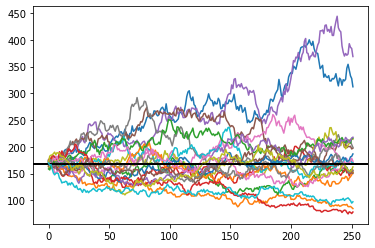

In [36]:
df = yf.download("CE")
returns = np.log(1+df['Adj Close'].pct_change())
mu, sigma = returns.mean(), returns.std()

sim_rets = np.random.normal(mu, sigma, 252)

initial = df['Adj Close'].iloc[-1]

sim_prices = initial*(sim_rets +1).cumprod()

for i in range(20):
  sim_rets = np.random.normal(mu, sigma, 252)
  sim_prices = initial*(sim_rets +1).cumprod()
  plt.axhline(initial, c ='k')
  plt.plot(sim_prices)